Load data

In [244]:
import pandas as pd

In [245]:
data = pd.read_csv('application_train.csv')
data.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
191180,321671,0,Cash loans,F,N,Y,0,135000.0,284400.0,22599.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
data.shape

(307511, 122)

Make a copy so that we can always go back to the original data.  

In [247]:
df = data.copy()
df = df.rename(columns=lambda x: x.lower())
df.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
262430,403804,0,Revolving loans,F,N,N,2,81000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We decided to keep only those few columns that are strongly correlated with the target.  We had decided on the following features/columns.  

In [248]:
col_num = ['ext_source_3',
           'ext_source_2',
           'ext_source_1',
           'days_birth',
           'region_rating_client_w_city',
           'days_last_phone_change',
           'days_id_publish',
           'reg_city_not_work_city',
           'flag_emp_phone',
           'reg_city_not_live_city',
           'flag_document_3',
           'floorsmax_avg'
          ]

col_cat = ['name_education_type',
           'name_income_type']

Ensure that the column names are spelled correctly.  

continuous

In [249]:
sum(col in df.columns for col in col_num) == len(col_num)

True

discrete

In [250]:
sum(col in df.columns for col in col_cat) == len(col_cat)

True

And these are all we need ... for now.  

Actually we would like to combine the external sources (using Nick')!  

df['ext'] = df['ext_source_1'].fillna(0) \
          + df['ext_source_2'].fillna(0) \
          + df['ext_source_3'].fillna(0)
df['ext'].head()

data['EXT'] = df['ext']

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

df['ext'].hist(bins=20);

col_num.remove('ext_source_3')

'ext_source_3' in col_num

col_num.append('ext')

'ext' in col_num

In [251]:
cols = col_num + col_cat + ['target']
len(cols)

15

In [252]:
df = df[cols]
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
64755,0.253963,0.718381,NaN,-15943,2,-3.0,-4220,0,1,0,1,0.0417,Secondary / secondary special,Working,0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
ext_source_3                   246546 non-null float64
ext_source_2                   306851 non-null float64
ext_source_1                   134133 non-null float64
days_birth                     307511 non-null int64
region_rating_client_w_city    307511 non-null int64
days_last_phone_change         307510 non-null float64
days_id_publish                307511 non-null int64
reg_city_not_work_city         307511 non-null int64
flag_emp_phone                 307511 non-null int64
reg_city_not_live_city         307511 non-null int64
flag_document_3                307511 non-null int64
floorsmax_avg                  154491 non-null float64
name_education_type            307511 non-null object
name_income_type               307511 non-null object
target                         307511 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 35.2+ MB


Looks like some of the columns have missing values.  (We already knew this!)  Let's just collect the names in a list.  HINT: They are all continuous!  

In [254]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

5

For simplicity, let's just replace the missing values by the means of their corresponding columns.  

In [255]:
for col in has_null:
    df[col].fillna(df[col].mean(), inplace=True)

Let's just check that there is no missing value.  

In [256]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

0

Modeling time!!  

### OneHotEncoding, first. 

In [257]:
from sklearn.preprocessing import OneHotEncoder

In [258]:
encoder = OneHotEncoder()

In [259]:
X = df.copy()
X.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
38537,0.470456,0.588106,0.50213,-23726,2,-1487.0,-4449,0,0,0,0,0.1667,Secondary / secondary special,Pensioner,0


In [260]:
X.drop(col_cat, axis=1, inplace=True)
X.shape

(307511, 13)

In [261]:
X = X.join(pd.get_dummies(
    df[['name_education_type', 
        'name_income_type']]))

In [262]:
X.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working
50673,0.600658,0.633755,0.50213,-13104,2,-1031.0,-4029,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [263]:
X.shape

(307511, 26)

In [264]:
y = X['target']
X = X.drop('target', axis=1)

Scaling  

In [265]:
from sklearn.preprocessing import scale

In [266]:
X = scale(X)

In [267]:
X.shape

(307511, 25)

In [268]:
X = pd.DataFrame(X)
X.sample()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
288429,2.138178e-13,-2.398166,-1.592919e-15,1.168656,-0.062699,1.135525,-0.278776,-0.547236,0.468697,-0.291208,...,-0.112095,-1.565416,-0.005703,-0.550997,-0.004032,-0.468573,-0.275564,-0.007651,-0.008459,0.967876


In [269]:
from sklearn.model_selection import train_test_split

In [270]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Logistic regression

In [271]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [272]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9191055958791852

In [273]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[70632,    40],
       [ 6179,    27]])

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

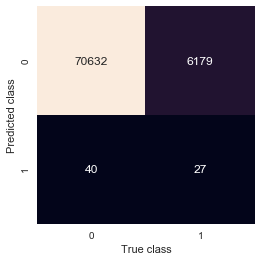

In [275]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [276]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, ypred)

0.501892316702431

Consider only complete rows

In [277]:
cols_UPPER = [col.upper() for col in cols]
df_conservative = data[cols_UPPER].dropna()
df_conservative.shape

(58021, 15)

In [278]:
y = df_conservative['TARGET']

In [279]:
X = df_conservative.drop('TARGET', axis=1)

In [280]:
X.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [281]:
col_cat_UPPER = [col.upper() for col in col_cat]
X.drop(col_cat_UPPER, axis=1, inplace=True)
X.shape

(58021, 12)

In [282]:
X = X.join(pd.get_dummies(
    df_conservative[col_cat_UPPER]))

X.shape

(58021, 24)

In [283]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [284]:
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [285]:
accuracy_score(ytest, ypred)

0.9336136770991313

In [286]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[13543,     0],
       [  963,     0]])

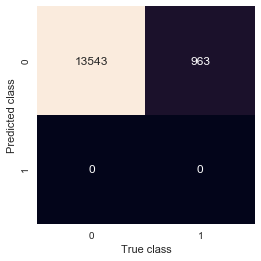

In [287]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [288]:
roc_auc_score(ytest, ypred)

0.5

Consider only complete rows and subsampling

In [289]:
df_conservative['TARGET'].value_counts()

0    54297
1     3724
Name: TARGET, dtype: int64

In [290]:
subsample = df_conservative[df_conservative['TARGET'] == 0].sample(3724)
subsample.sample()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,FLOORSMAX_AVG,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,TARGET
181052,0.681706,0.641048,0.165914,-9966,2,-663.0,-2652,1,1,1,1,0.1667,Higher education,Working,0


In [291]:
subsample = subsample.append(df_conservative[df_conservative['TARGET'] == 1])
subsample.shape

(7448, 15)

In [292]:
y = subsample['TARGET']

In [293]:
X = subsample.drop('TARGET', axis=1)

In [294]:
col_cat_UPPER = [col.upper() for col in col_cat]
X.drop(col_cat_UPPER, axis=1, inplace=True)
X.shape

(7448, 12)

In [295]:
X = X.join(pd.get_dummies(
    subsample[col_cat_UPPER], drop_first=True))

X.shape

(7448, 19)

In [296]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Naive Bayes

In [297]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)

In [298]:
accuracy_score(ytest, ypred)

0.6557465091299678

In [299]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[593, 362],
       [279, 628]])

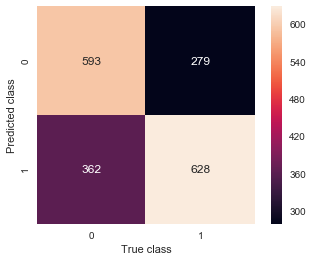

In [300]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [301]:
roc_auc_score(ytest, ypred)

0.6566674555666515

### Logistic regression

In [302]:
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [303]:
accuracy_score(ytest, ypred)

0.6976369495166488

In [304]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[667, 288],
       [275, 632]])

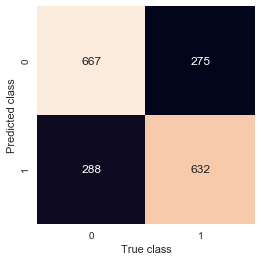

In [305]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [306]:
roc_auc_score(ytest, ypred)

0.6976159827288628

This is much better (sort of!)

### Random Forest

In [307]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [308]:
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [309]:
accuracy_score(ytest, ypred)

0.6546723952738991

In [310]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[700, 255],
       [388, 519]])

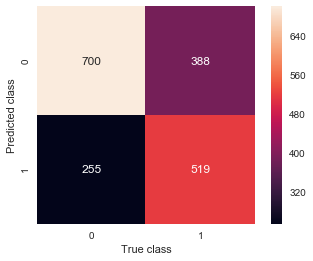

In [311]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [312]:
roc_auc_score(ytest, ypred)

0.6526001951084353

### adaboost

In [313]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)

In [314]:
accuracy_score(ytest, ypred)

0.6960257787325457

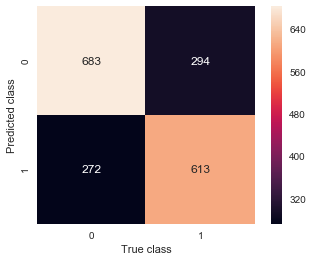

In [315]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [316]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.70      0.72      0.71       955
          1       0.69      0.68      0.68       907

avg / total       0.70      0.70      0.70      1862



In [317]:
roc_auc_score(ytest, ypred)

0.6955188556717099

#### GBT 

In [318]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain, ytrain)
ypred = gbc.predict(Xtest)

In [319]:
accuracy_score(ytest, ypred)

0.69656283566058

Text(84.4,0.5,'Predicted class')

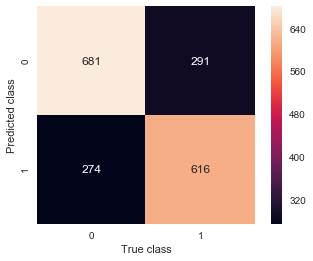

In [320]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class')

In [321]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.70      0.71      0.71       955
          1       0.69      0.68      0.69       907

avg / total       0.70      0.70      0.70      1862



In [322]:
print(roc_auc_score(ytest, ypred))

0.6961255390014834


In [326]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': gbc.feature_importances_})

fi = fi.sort_values(by='importance', ascending=False)
fi.tail()

,importance,variable
16,0.001097,NAME_INCOME_TYPE_Pensioner
7,0.000080,REG_CITY_NOT_WORK_CITY
8,0.000000,FLAG_EMP_PHONE
14,0.000000,NAME_EDUCATION_TYPE_Lower secondary
18,0.000000,NAME_INCOME_TYPE_Working


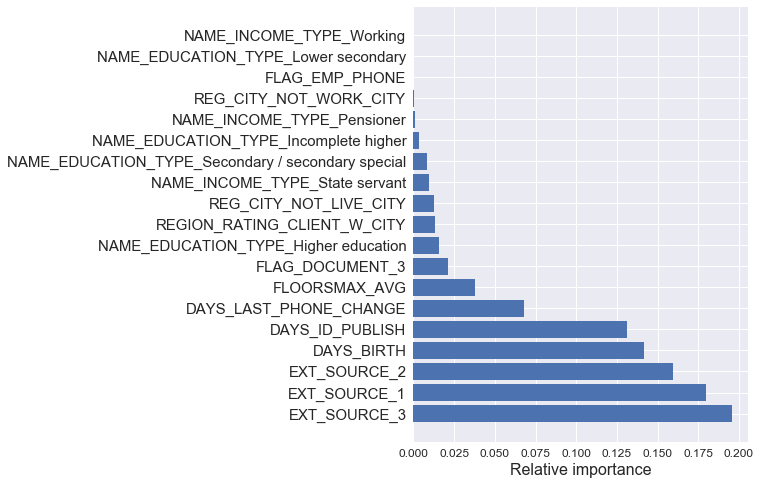

In [334]:
how_many = fi.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(how_many), fi['importance'].head(how_many))
plt.yticks(range(how_many), fi['variable'].head(how_many), size=15)
plt.xticks(size=12)
plt.xlabel('Relative importance', size=16)
plt.show()

Keeping all the externals actually gave us a better score!  

## Hyperparameter tuning

#### GBT

In [344]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
param_grid = [{'learning_rate': [0.1, 1.0]},
              {'n_estimators': [100, 200]},
              {'max_depth': [3, 5, 7]}]

gs = GridSearchCV(gbc, 
                 param_grid,
                 cv=5,
                 scoring='f1')

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.1, 1.0]}, {'n_estimators': [100, 200]}, {'max_depth': [3, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best parameters

In [345]:
gs.best_params_

{'n_estimators': 100}

Best estimator

In [346]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

ROC score

In [347]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.6961255390014834

Feature importance

In [348]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': model.feature_importances_})

fi = fi.sort_values(by='importance', ascending=False)
fi.head()

,importance,variable
0,0.195708,EXT_SOURCE_3
2,0.179987,EXT_SOURCE_1
1,0.158965,EXT_SOURCE_2
3,0.142166,DAYS_BIRTH
6,0.132443,DAYS_ID_PUBLISH


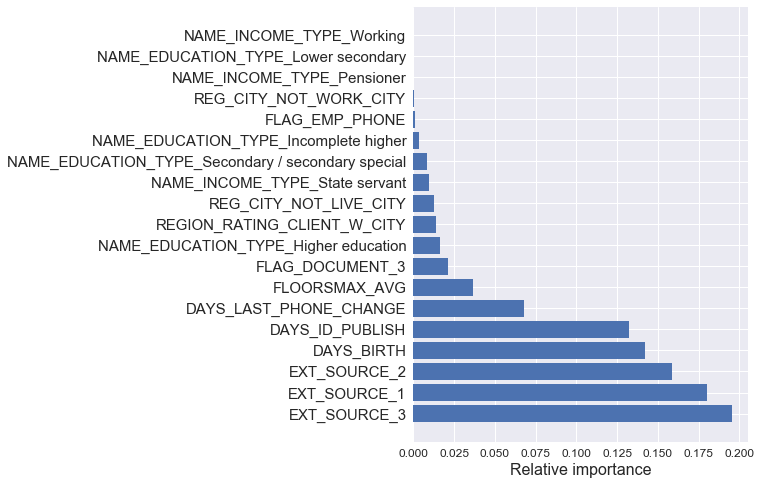

In [349]:
how_many = fi.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(how_many), fi['importance'].head(how_many))
plt.yticks(range(how_many), fi['variable'].head(how_many), size=15)
plt.xticks(size=12)
plt.xlabel('Relative importance', size=16)
plt.show()

#### Logistic Regression

In [350]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.10, 1.0, 10., 100.],
              'fit_intercept': [False, True],
              'max_iter': [50, 100, 200]}

gs = GridSearchCV(estimator=LogisticRegression(),
                 param_grid = param_grid,
                 scoring='accuracy',
                 cv=5)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [False, True], 'max_iter': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Best parameters

In [351]:
gs.best_params_

{'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}

Best estimator

In [352]:
gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

ROC score

In [353]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.698386026079879